# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from glob import glob
import sys, os
import cv2


In [5]:
!wget https://www.theluxecafe.com/wp-content/uploads/2014/07/ferrari-spider-indian-theluxecafe.jpg

--2020-06-03 12:40:13--  https://www.theluxecafe.com/wp-content/uploads/2014/07/ferrari-spider-indian-theluxecafe.jpg
Resolving www.theluxecafe.com (www.theluxecafe.com)... 103.50.163.41
Connecting to www.theluxecafe.com (www.theluxecafe.com)|103.50.163.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95114 (93K) [image/jpeg]
Saving to: ‘ferrari-spider-indian-theluxecafe.jpg’

ferrari-spider-indi 100%[===================>]  92.88K   161KB/s    in 0.6s    

2020-06-03 12:40:14 (161 KB/s) - ‘ferrari-spider-indian-theluxecafe.jpg’ saved [95114/95114]



In [6]:
!ls 

ferrari-spider-indian-theluxecafe.jpg  sample_data


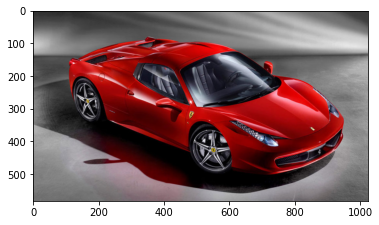

In [7]:
X = cv2.imread('ferrari-spider-indian-theluxecafe.jpg')
X = cv2.cvtColor(X, cv2.COLOR_BGR2RGB)
plt.imshow(X)

In [8]:
print(X.shape)

(582, 1024, 3)


In [0]:
IMAGE_SIZE = X.shape

In [0]:
X = np.expand_dims(X, axis=0)

In [11]:
print(X.shape)

(1, 582, 1024, 3)


In [12]:
y = np.ndarray([1])
print(y.shape)

(1,)


In [0]:
i_layer = Input(shape = IMAGE_SIZE)
h_layer = MaxPool2D((2,2), padding='same')(i_layer)
h_layer = Flatten()(h_layer)
o_layer = Dense(1, activation='sigmoid')(h_layer)

model = Model(i_layer, o_layer)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 582, 1024, 3)]    0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 291, 512, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 446976)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 446977    
Total params: 446,977
Trainable params: 446,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [18]:
report = model.fit(X, y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 6.2995e-09 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000

In [21]:
model.layers

In [22]:
layer = model.layers[1]
print(layer)

In [0]:
model_visual = Model(inputs=model.inputs, outputs=layer.output)

In [27]:
model_visual.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 582, 1024, 3)]    0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 291, 512, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [28]:
maps = model_visual(X)
print(maps.shape)

(1, 291, 512, 3)


In [0]:
size = tuple(maps.shape)

In [38]:
maps.shape[3]

3

In [41]:
size

(1, 291, 512, 3)

In [0]:
size = [size[1], size[2], size[3]]

In [45]:
size = tuple(size)
print(size)

(291, 512, 3)


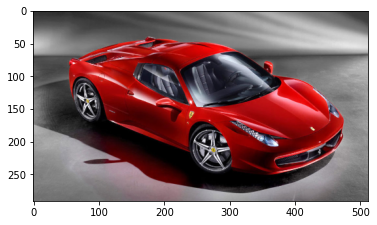

In [51]:
ax = plt.subplot()
plt.imshow(np.array(maps, dtype="int64").reshape(size))
plt.show()

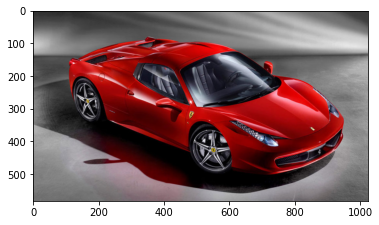

In [53]:
plt.imshow(X[0,:,:,:])